# 📈 Matplotlib
Matplotlib je knihovna pro vytváření statických, animovaných a interaktivních vizualizací v Pythonu 🐍. Vizualizace lze stylovat (např. vybrat barevnou paletu, velikost,...) a exportovat do různých formátů souborů. Jak s matplotlibem pracovat si ukážeme v tomto notebooku.

📚 [tutoriály](https://matplotlib.org/stable/tutorials/index)

🗂 [dokumentace](https://matplotlib.org/stable/api/index)

👨🏽‍💻 [user guide](https://matplotlib.org/stable/users/index)

Pokud chceme začít matplotlib používat, musíme jej importovat. Nestačí importovat čistý `matplotlib`. My budeme používat balíček `pyplot`. Více si o něm povíme za chvíli. Komunitou používaný alias pro `matplotlib.pyplot` je `plt`.

In [25]:
import matplotlib.pyplot as plt

## 🏗 Architektura knihovny
Matplotlib lze rozdělit do tří vrstev: backend, Artist a skriptovací vrstva.

#### 🖌 Backend vrstva `matplotlib.backend_layers`
* nejkomplexnější vrstva mající na starost interakci s toolkity (Agg, Cairo, Gtk, Qt, Wx, ...) pro renderování grafického výstupu do souboru i formou interaktivního GUI
* její základní prvky jsou `FigureCanvas`, `Renderer` a `Event`
     * `FigureCanvas` je oblast, na kterou se dá kreslit
     * `Renderer` je objekt, který umí kreslit na `FigureCanvas`
         * můžeme si to představit tak, že `FigureCanvas` je plátno a `Renderer` je štětec
     * `Event` zpracovává uživatelské vstupy (stisk klávesy, kliknutí myší, ...)
     
#### 👩‍🎨 Artist vrstva `matplotlib.artist`
* vrstva, která obsahuje všechny prvky, které se vykreslí na grafické plátno
* důležitá je abstraktní třída `Artist`, ze které dědí všechny třídy, které využívají `Renderer` k tomu, aby něco nakreslily na `FigureCanvas`
* téměř všechny viditelné elementy na grafu (např. legenda, x y osy, texty, ...) jsou podtřídou třídy `Artist`

#### 📜 Skriptovací vrstva `matplotlib.pyplot`
* rozhraní, které typicky používá uživatel
* zjednodušuje práci s knihovnou na časté use casy jako je například tvorba často používaných grafů
* nabízí dva druhy rozhraní
    * procedurální stavové rozhraní (pyplot API a dnes již nedoporučované pylab API)
    * objektově orientované rozhraní (preferované)
    
![layers](img/layers.png)
    
# ☝️ Anatomie matplotlib grafu
### Figure
`Figure` reprezentuje celou vizualizaci. Může se skládat z více `Axes` objektů a speciálních `Artist` objektů jako je např. nadpis a legenda pro celou vizualizaci, barevná paleta a podobně.

### Axes
`Axes` je třída, která dědí od `Artist` a má přiřazen určitý region z `Figure`, na který může vykreslovat. `Axes` může mít svůj vlastní nadpis a většinou obsahuje dvě (nebo v případě 3D grafu tři) osy, které se skládají z popisu, hlavních a vedlejších značek (major and minor ticks) a jejich pojmenování (tick labels). Osu reprezentuje objekt `Axis` (pozor na záměnu pojmů `Axis` a `Axes`).

![anatomy](img/anatomy.png)

# ☝️ Rozhraní knihovny Matplotlib
Už jsme si říkali, že skriptovací vrstva (ta, se kterou budeme nejčastěji interagovat) poskytuje procedurální stavové a objektově orientované rozhraní. Pojďme se podívat na to, jaký je v nich rozdíl.

### Stavové rozhraní
*  mezi jednotlivým voláním funkcí modulu matplotlib.pyplot se zachovává stav
*  každá funkce způsobí nějakou změnu stavu, čímž se pravděpodobně změní i výsledná vizualizace
    
Na ukázku stavového rozhraní použijeme pár funkcí z matplotlibu, které zatím neznáte, ale nebojte se 😉, vše si postupně vysvětlíme. Zatím jde pouze o to, abyste pochopili jak funguje stavové rozhraní – existuje nějaký interní stav a my ho měníme tím, že voláme funkce.

In [3]:
# let's create data
x = [0,0.3,1]
y1 = [0,0.9,0.5]
y2 = [0,0.3,0.7]
y3 = [0,0.4,1]

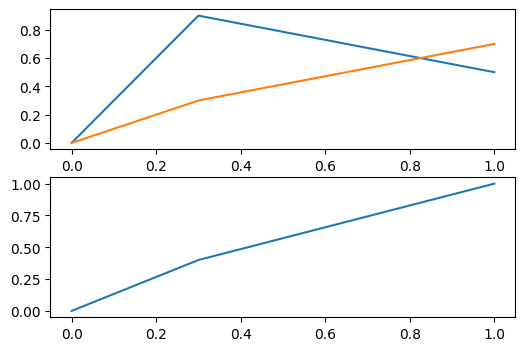

In [4]:
# this is how you plot the data using state based interface
plt.figure(figsize=(6,4)) 
plt.subplot(2,1,1) 
plt.plot(x, y1) 
plt.plot(x, y2) 
plt.subplot(2,1,2) 
plt.plot(x, y3) 
plt.show()

### Objektově orientované rozhraní
* využívá OO návrhu knihovny Matplotlib
* dovoluje vyšší míru kontroly nad výstupem
* prvním krokem je vytvoření instance Figure
* metody voláme vždy nad nějakou instancí

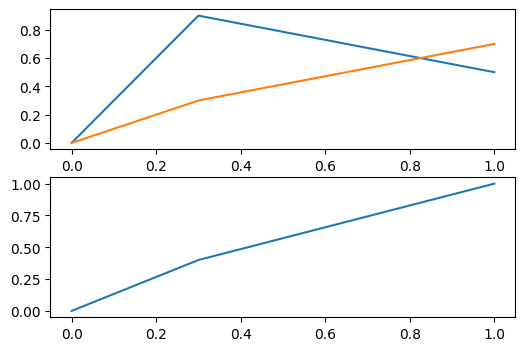

In [5]:
# same example as above using object oriented interface
fig = plt.figure(figsize=(6,4)) 
ax = fig.add_subplot(2,1,1) 
ax.plot(x, y1)
ax.plot(x, y2)
ax = fig.add_subplot(2,1,2) 
ax.plot(x, y3);

⚠️ POZOR! ⚠️ Nikdy nemíchejte objektově orientované a stavové rozhraní dohromady! Může to vézt na obtížně laditelné chyby, které se projeví jen někdy.
Během tohoto kurzu budeme používat **objektově orientované rozhraní, jelikož je preferováno**.

In [6]:
# THIS CODE IS WRONG!!!
# plt.figure(figsize=(6,4)) 
# ax = plt.subplot(2,1,1) 
# ax.plot(x, y1) 
# plt.plot(x, y2)
# ax = plt.subplot(2,1,2)
# plt.plot(x, y3) 

# ☝️ Figure a Axes
Říkali jsme si, že `Figure` je třída, která reprezentuje celou vizualizaci. Jak ji vytvoříme? Pomocí funkce `figure`. Funkce `figure` má hodně parametrů. Zajímavé jsou například figsize, facecolor a edgecolor. Figsize určuje velikost výsledné `Figure` (určíme zadáním dvou čísel - výška a šířka v palcích), facecolor pozadí vizualizace a edgecolor barvu okraje. Pozn. použijeme barvy z ["xkcd color survey"](https://xkcd.com/color/rgb/).

🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

In [7]:
fig = plt.figure(figsize=(10,4), facecolor='xkcd:sky blue') # an empty figure with no Axes

<Figure size 1000x400 with 0 Axes>

Zatím se nic nezobrazuje. Chceme-li vidět výsledek, musíme přidat alespoň jednu `Axes`. S tím nám pomůže například funkce `add_subplot`.

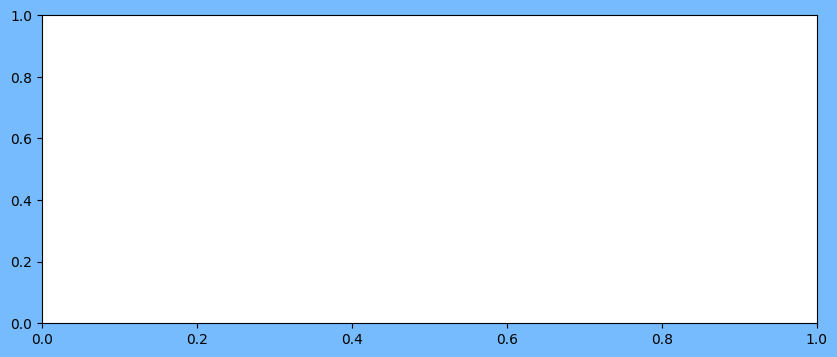

In [8]:
ax = fig.add_subplot()
# shows figure
fig 

Teď už můžeme vidět, že se projevila velikost i barva pozadí, kterou jsme nastavili při vytváření `Figure`. 

# ☝️ Organizace grafu
Jednotlivé `Axes` můžeme organizovat pomocí následujících funkcí: `Figure.add_axes`, `Figure.add_subplot`, `plt.subplots`, `Figure.add_gridspace`.

### `Figure.add_axes`
Pomocí této funkce lze `Axes` umístit na fixní pozici. Využijeme k tomu parametr rect - čtveřice (x,y,w,h)
  * x, y jsou souřadnice levého spodního rohu,
  * w, h jsou šířka a výška,
  * hodnoty se berou relativně, tedy šířka 0.5 znamená, že Axes bude mít poloviční šířku oproti celé Figure.

🗂 [dokumentace](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_axes)

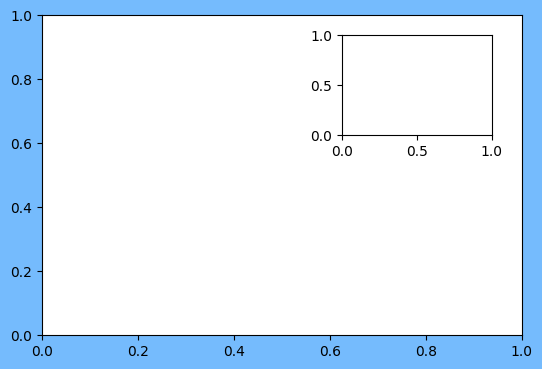

In [9]:
fig = plt.figure(figsize=(6,4), facecolor='xkcd:sky blue')
# bigger Axes
ax1 = fig.add_axes((0.1, 0.1, 0.8, 0.8))
# smaller Axes
ax2 = fig.add_axes((0.6, 0.6, 0.25, 0.25))

### `Figure.add_subplot` a `plt.subplots`
Tyto funkce slouží k umisťování grafů do mřížky.

🗂 [dokumentace add_subplot](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)

🗂 [dokumentace subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

Funkci `Figure.add_subplot` můžeme dát jako parametr  trojici integerů (počet řádků, počet sloupců a index), které vyjadřují pozici. Např. add_subplot(1,3,2) umístí Axes do středu 1x3 mřížky. Každý integer se implicitně nastaví na 1, takže pokud nespecifikujeme žádný parametr, vytvoří se 1x1 mřížka.

Funkci `plt.subplots` zadáme pouze počet řádků a sloupců a ona nám vrátí Figure a 1D nebo 2D pole Axes.

V kódu níže používáme `constrained_layout=True`. Ten zajistí automatické umístění všech prvků grafu tak, aby nedošlo k jejich překryvu a byla maximálně využita dostupná plocha.

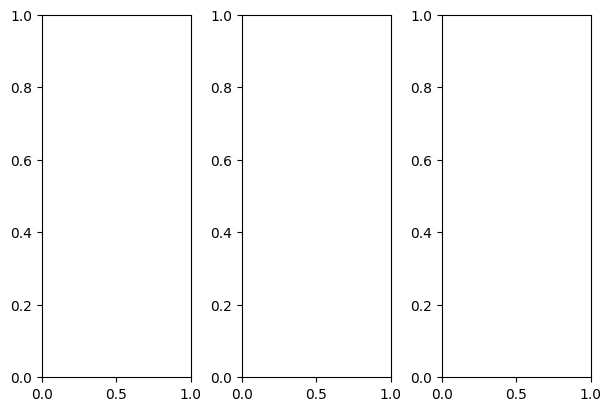

In [10]:
# organizes Axes in grid using Figure.add_subplot
fig = plt.figure(figsize=(6,4), constrained_layout=True)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

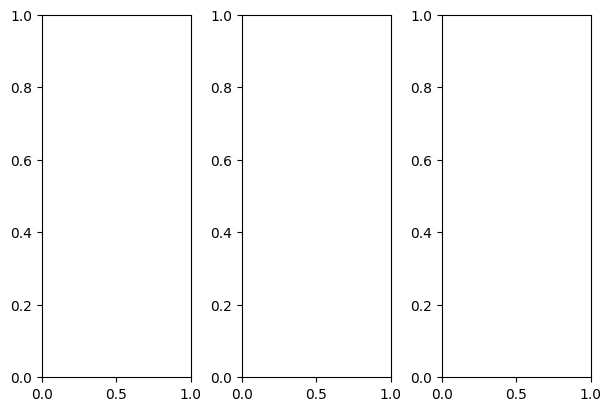

In [11]:
# same as above using plt.subplots
fig, axs = plt.subplots(1,3, figsize=(6,4), constrained_layout=True) 

#### `GridSpec` jako parametr `Figure.add_subplot`
Pokud chceme mít různé velikosti grafů v mřížce, můžeme využít `GridSpec`. Inicializujeme jej pomocí počtu řádků a sloupců a poté jej s využitím slice objektů můžeme použít jako parametr funkce `Figure.add_subplot`. 

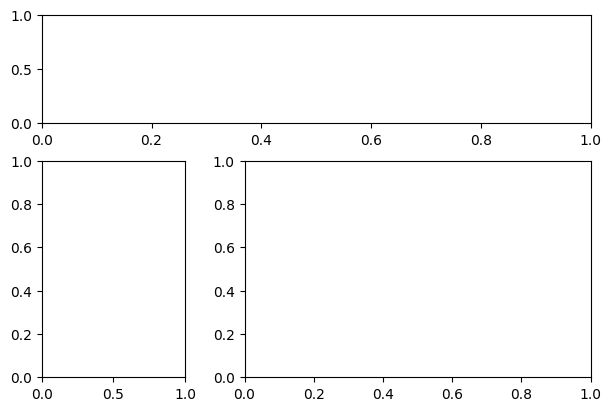

In [12]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,4), constrained_layout=True)

#initialize GridSpec
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

# use it as parameter
ax1 = fig.add_subplot(spec[0, :]) # first row, all columns
ax2 = fig.add_subplot(spec[1:3, 0]) # second and third row (indices 1 and 2, end index is exlusive), first column
ax3 = fig.add_subplot(spec[1:3, 1:3]) # second and third row, second and third column

# ☝️ Konfigurace os
V případě os máme možnost přizpůsobit například:
* viditelnost os,
* rozsah hodnot a směr,
* obsah, umístění a styl titulku (label),
* umístění a styl os (spines),
* četnost a styl hlavní a vedlejší značky (ticker marker),
* četnost, styl a obsah popisku hlavní a vedlejší značky (ticker label),
* sdílení os – viz vedlejší osa (twin axis)

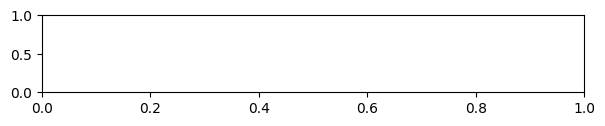

In [13]:
fig, ax = plt.subplots(figsize=(7,1)) 

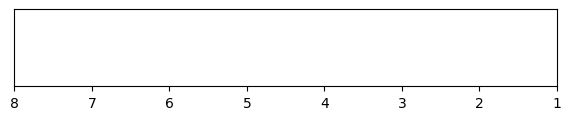

In [14]:
# makes y axis invisible
ax.yaxis.set_visible(False)
# sets leftmost value on x axis to 8 and rightmost value to 1
ax.set_xlim(left=8, right=1)
fig

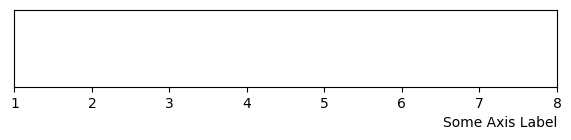

In [15]:
# adds label to x axis, loc='center' is default
ax.set_xlabel('Some Axis Label', loc='right')
# flips x axis (run this cell multiple times to see it)
ax.invert_xaxis()
fig

### Spines
Spines jsou čtyři čáry, které ohraničují Axes objekt. Pro každou ze čtyř spine čar lze individuálně přizpůsobit viditelnost, rozsah, umístnění a styl.

🗂 [dokumentace](https://matplotlib.org/stable/api/spines_api.html#module-matplotlib.spines)

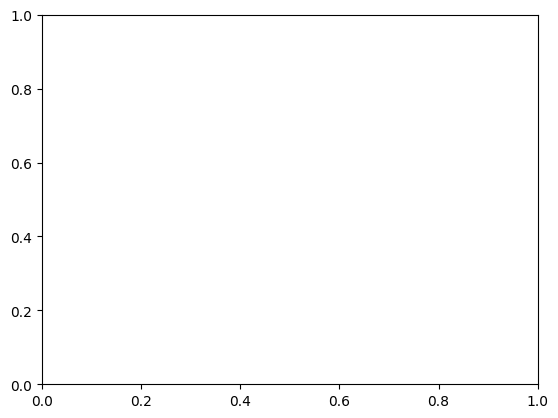

In [16]:
fig, ax = plt.subplots() 

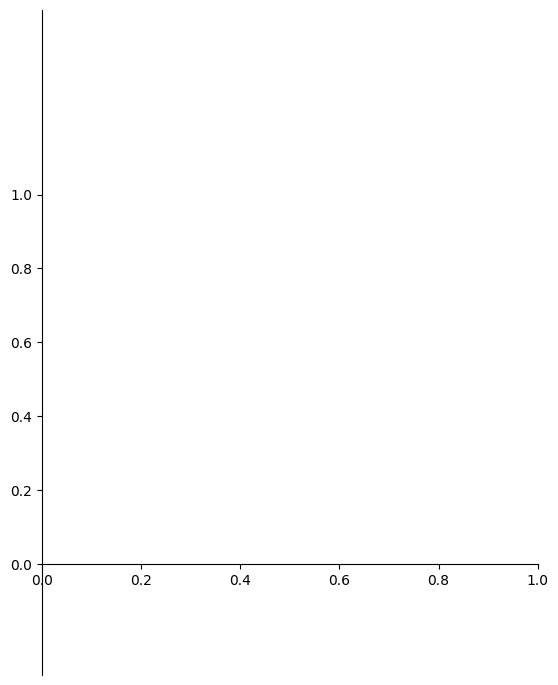

In [20]:
# makes top and right spine invisible
ax.spines[['top', 'right']].set_visible(False) 
fig

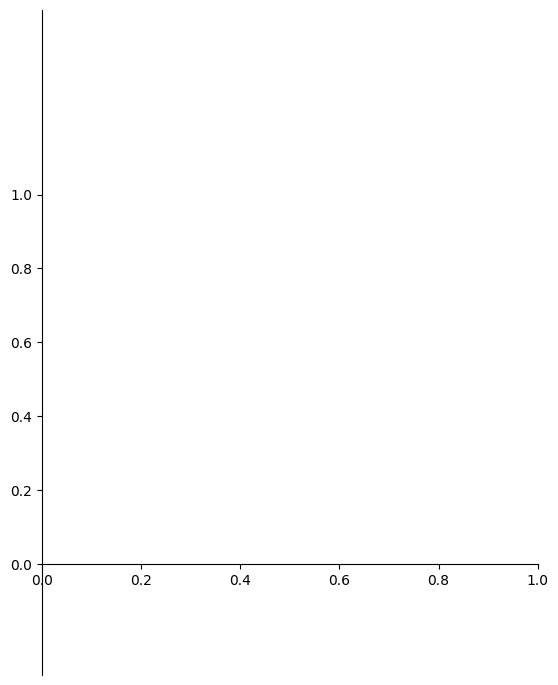

In [21]:
# changes left spine's bound from (0,1) to (-0.3,1.5)
ax.spines['left'].set_bounds(-0.3, 1.5)
fig

Umístnění spines definujeme pomocí dvojice (position type, amount), přičemž position
type může být 'outward', 'axes' nebo 'data', výchozí ('outward', 0).

🗂 [dokumentace](https://matplotlib.org/stable/api/spines_api.html#matplotlib.spines.Spine.set_position)

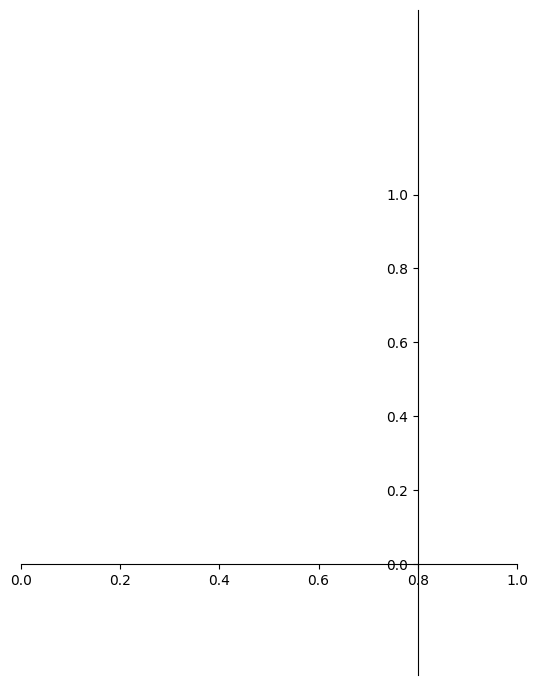

In [22]:
# bottom spine will start where Axes area starts
ax.spines['bottom'].set_position(('axes', 0))
# left spine will start at data position 0.8
ax.spines['left'].set_position(('data', 0.8))
fig

Styl nastavíme pomocí `set_color`, `set_linestyle`, `set_linewidth` a `set_capstyle`.

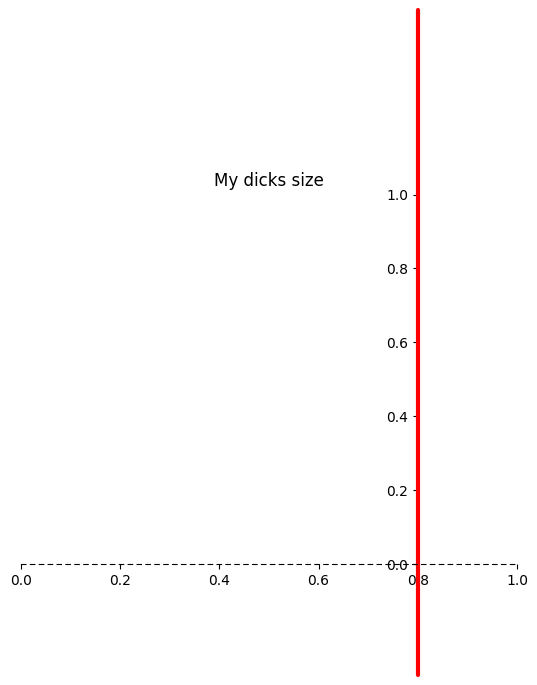

findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.


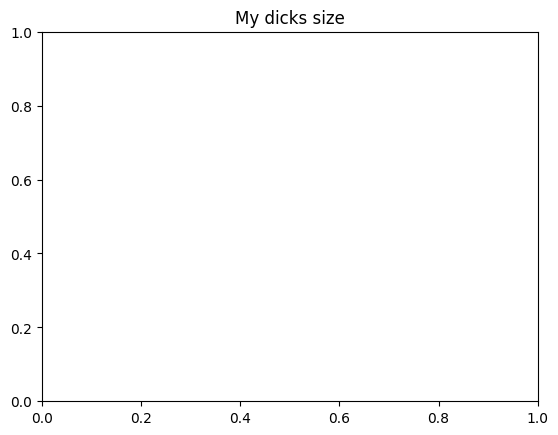

In [31]:
ax.spines['bottom'].set_linestyle((0,(4,4)))
ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_capstyle('round') 

plt.title('My dicks size', fontname = 'Comic Sans MS')
fig

### Hlavní a vedlejší značky
Styl značek lze konfigurovat pomocí metody `Axes.tick_params` nebo `Axes.xaxis.set_tick_params` pro konkrétní osu. Dokážeme nimi měnit styl značek (direction, length, width, color, pad), styl popisku (labelsize, labelcolor, labelrotation) a jejich viditelnost.

In [ ]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', direction='out', width=4, length=20, bottom=False, top=True, labelbottom=True, labeltop=True)
ax.tick_params(axis='y', direction='in', left=True, right=True, labelleft=True, labelright=False, labelcolor='red')

#### Locator a Formatter
Četnost značek na hlavní a vedlejší ose určuje  `Locator`, popisky přiřazené jednotlivým značkám určuje `Formatter`. `Locator` nastavíme pomocí metod `set_minor_locator`/`set_major_locator` definovaných pro objekt `Axis`.
`Formatter` má analogické metody `set_minor_formatter`/`set_major_formatter`.

🗂 [dokumentace](https://matplotlib.org/stable/api/ticker_api.html)

Podtřídy třídy `Locator`:
* AutoLocator – automatické generování hlavních značek (výchozí),
* AutoMinorLocator – automatické generování vedlejších značek,
* NullLocator – bez značek (výchozí pro minor),
* MaxNLocator – automatické vygenerování maximálně N značek (základ AutoLocator), 
* LinearLocator – rovnoměrně rozmístěný pevně daný počet značek,
* MultipleLocator – značky na násobcích báze,
* LogLocator – značky rovnoměrně či nerovnoměrně rozmístěné na logaritmické ose, 
* FixedLocator – značky na pevně daných pozicích,
* další IndexLocator, SymmetricalLogLocator, LogitLocator

Podtřídy třídy `Formatter`:
* NullFormatter – vrací prázný řetězec, 
* FixedFormatter – seznam řetězců definovaný pro jednotlivé značky, 
* FuncFormatter – formátování pomocí funkce, 
* FormatStrFormatter – formátování pomocí sprintf, 
* StrMethodFormatter – formátování pomocí format, 
* PercentFormatter – přidá procenta,
* LogFormatter, LogFormatterExponent, LogFormatterMathtext – pro log. osu, a další

K variantě založené na `Locator` a `Formatter` existuje jednodušší alternativna pro volbu konkrétních pozic značek a nastavení jejich popisku - `Axes.set_xticks`, `Axes.set_xticklables` nebo `Axis.set_ticks`, `Axis.set_ticklables`. Podívejme se nejprve na tuto alternativu.

In [ ]:
fig, ax = plt.subplots(figsize=(7,1))
ax.set_xticks([-20,-5,0,5,20])
ax.set_xticklabels(['A',None,'zero',None,'Z']);

A teď si ukážeme některé způsoby formátování pomocí `Locator` a `Formatter`.

In [ ]:
# Locators and Formatters are implemented in matplotlib.ticker
import matplotlib.ticker as ticker

In [ ]:
fig, ax = plt.subplots(figsize=(7,1))
ax.set_xlim(left=-30, right=30);

In [ ]:
# major ticks at fixed positions -20,-5,0,5,20
fmt=ticker.FixedLocator([-20,-5,0,5,20]) 
ax.xaxis.set_major_locator(fmt)
fig

In [ ]:
# automatically generated minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
fig

In [ ]:
# minor tickes at multiples of 2.5
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
fig

In [ ]:
# tick label formating using sprintf
fmt=ticker.FormatStrFormatter("%.1f k") 
ax.xaxis.set_major_formatter(fmt)
fig

In [ ]:
# tick labels as percentage, xmax is equal to 100%
fmt=ticker.PercentFormatter(xmax=20, decimals=0) 
ax.xaxis.set_major_formatter(fmt)
fig

In [ ]:
# you can create your own function to generate labels
# it needs to have two inputs (a tick value x and a position pos)
def custom_formatter(x, pos):
    # returns a string containing the corresponding tick label
    return f'#{pos}\n{x:.0f}'

# use FuncFormatter with your function as parameter
fmt=ticker.FuncFormatter(custom_formatter) 
ax.xaxis.set_major_formatter(fmt)
fig

### Vedlejší osa
Metoda `Axes.twinx` a `Axes.twiny` umožňuje vytvořit nový podgraf (Axes), který sdílí osu X resp. Y, což umožňuje vytvoření vedlejší osy Y resp. X.

Pozor, metoda duplikuje celý objekt `Axes` včetně všech prvků.

In [ ]:
fig = plt.figure(figsize=(6,4), constrained_layout=True) 
ax1 = fig.add_subplot()
# duplicates ax1, x axis will be shared between axes
ax2 = ax1.twinx()

# hides unnecessary spines
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False) 

# sets axis min and max values
ax1.set_xlim(0,30)
ax1.set_ylim(0,0.1)
ax2.set_ylim(0,1)

# sets y axis labels
ax1.set_ylabel('Vlhkost (%)') 
ax2.set_ylabel('Teplota (\u2103)');

# ☝️ Mřížka
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)

Mřížku lze konfigurovat pomocí metody `grid`.

Parametry
* visible určuje viditelnost, povolené hodnoty True, False, None
* which určuje, konfigurujeme-li hlavní / vedlejší mřížku
* axis určuje, konfigurujeme-li horizontální / vertikální čáry
* keywords parametry viz vlastnosti 2D čáry [Line2Dprops](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
# adds minor ticks for y axis
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# red dotted lines placed on major x ticks
ax.grid(axis="x", color="red", linewidth=1, linestyle=":") 
# black lines on major y ticks, alpha sets opacity
ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
# more opaque black lines on minor y ticks
ax.grid(axis="y", which='minor', color="black", alpha=.1, linewidth=.5);

# ☝️ Legenda
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

Legendu lze konfigurovat pomocí funkce `legend`.

Názvy prvků legendy lze zadat jako parametr. Pokud je nezadáme, matplotlib si nějaký název vygeneruje sám. Kromě názvu lze parametrem zadat umístění (loc), kotvu (bbox_to_anchor), počet sloupců (ncol) a jiné.

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)

# without any data to plot, legend is not showing
ax.plot(x, y1, label='y1')
ax.plot(x, y2, label='y2')

# default legend (y1 y2 labels)
l = ax.legend() 
ax.add_artist(l)

# custom labels and location
l = ax.legend(['a label', 'another label'], loc='upper left') 
ax.add_artist(l)

# sets number of columns to 2
l = ax.legend(['blue line', 'orange line'], loc='lower right', ncol=2);

# ☝️ Barvy a styly
### Barvy
[list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

Barvu lze specifikovat několika způsoby:
* RGB / RGBA n-tice desetinných hodnot v rozsahu , např. (0.1, 0.2, 0.5)
* hexadecimální RGB / RGBA řetězec, např. #FF8000 nebo #FF8000FF
* řetězec reprezentující hodnotu v rozsahu pro úroveň šedé, např. '0.5'
* jednoznaková konstanta, např 'r' - red, 'b' - blue
* řetězec dle [X11](https://en.wikipedia.org/wiki/X11_color_names)/[CSS4](https://www.w3.org/TR/css-color-4/), např. 'Coral' , 'lawngreen'
* řetězec dle xkcd color survey s prefixem ''xkcd::'' , např. 'xkcd:sky blue'
* řetězec z palety Tableau T10 (výchozí paleta), např. 'tab:blue', 'tab:orange', 'tab:green'
* řetězec tvořený znakem 'C' následovaným jednou číslicí, která určuje index do výchozí palety. Pokud je index mimo rozsah, je použita černá.

![css colors](img/colors.png)

### Typy čar
[linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)

Typ čáry lze specifikovat následovně (viz doc): 
* jedna z variant symbolických zkratek ' ', '-', ':', '--', '-.' odpovídající následujícím stylům: bez čáry, čárkovaná, čerchovaná, tečkovaná
* jeden z řetězců 'solid', 'dotted', 'dashed', 'dashdot'
* pomocí tzv. dash tuple (offset, (on_off_sequence)) četností jednotlivých segmentů

Příklady dash tuple:
* solid odpovídá (0, ())
* dotted odpovídá (0, (1, 1)) 
* definice (0, (3, 10, 1, 15)) znamená offset 0, čára 3pt, mezera 10pt, čára 1pt, mezera 15pt

![linestyles](img/linestyles.webp)

### Typy značek
🗂 [dokumentace](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

Typ značky lze specifikovat pomocí:
* jedné z variant symbolických zkratek ' ', '.', 'o', 'd', 'v', '^', '<', '>', '+', 'x', '*', ...
* řetězce začínajícího a končícího znakem \\$ definující text vysázený pomocí MathText, např. \\$\alpha\\$ -> $\alpha$
* seznamu dvojic určující pozice vrcholů cesty, přičemž střed je umístěn v (0,0), např.
[(-1, -1), (1, -1), (1, 1), (-1, -1)]
* dvojice (numsides, N) nebo trojice (numsides, N, angle) pro pravidelný
    * polygon (N=0) s numsides stranami 
    * hvězdu (N=1) s numsides cípy 
    * hvězdici (N=2) s numsides paprsky 
* instance třídy Path

![marks](img/marks.png)

# ☝️ Grafy

Ani zdaleka si neukážeme všechny typy grafů, které se v matplotlibu dají nakreslit. Přikládáme odkazy, kde můžete najít více informací.

🗂 [dokumentace](https://matplotlib.org/stable/api/axes_api.html#plotting)

📊 [příklady](https://matplotlib.org/stable/gallery/index.html)

Budeme se snažit, aby byl kód přehledný a tím pádem co nejkratší. Je ale dobré vědět, že každá funkce, kterou budeme používat, přijímá mnoho parametrů, kterými lze ovlivnit její výstup. Podívejte se při každém grafu do přiložené dokumentace 🙂.

V této sekci budeme využívat balíček numpy.

In [ ]:
import numpy as np

# data preparation - 20 linearly spaced numbers from -pi to pi
x = np.linspace(-np.pi,np.pi,20)
y = np.sin(x)
print(x)
print(y)

#### ✨ Line chart
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
# fig and ax init
fig, ax = plt.subplots()
# line chart
ax.plot(x, y);

#### ✨ Stem plot (Lollipop plot)
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html)

In [ ]:
# fig and ax init
fig, ax = plt.subplots()
# stem plot
ax.stem(x, y);

#### ✨ Step plot
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.step.html)

In [ ]:
# fig and ax init
fig, ax = plt.subplots()
# step plot
ax.step(x, y);

#### ✨ Bar chart
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)

In [ ]:
# data preparation
x = np.linspace(0,7,8) 
y = np.sin(np.linspace(0,2*np.pi,8)+0.1)

# fig and ax init
fig, ax = plt.subplots()

# bar chart
ax.bar(x, y, color='xkcd:sky blue')

# styling
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero');

#### ✨ Stacked bar chart

In [ ]:
# data preparation
x = range(0,8) 
y1 = np.random.uniform(0,1, 8) 
y2 = (1-y1)

# fig and ax init
fig, ax = plt.subplots(figsize=(6,4)) 

# stacked bar chart
ax.bar(x, y1, width=0.7, align='center', bottom=0, color='xkcd:sky blue')
ax.bar(x, y2, width=0.7, align='center', bottom=y1, color='#eeeeee');

#### ✨ Scatter plot
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

In [ ]:
# data preparation
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

# fig and ax init
fig, ax = plt.subplots(figsize=(6,4)) 

# scatter plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5);

#### ✨ Pie chart
🗂 [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)

In [ ]:
# data preparation
labels = ['Group 1', 'Group 2']
sizes = [222, 111]

# fig and ax init
fig, ax = plt.subplots()

# pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['paleturquoise', 'lightskyblue'])

# equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal');

# 🎉 A to je vše! 🎉 
Příště vytvoříme pár kvalitních grafů, ve kterých zkombinujeme věci, které jsme se v tomto notebooku naučili.